<a href="https://colab.research.google.com/github/wesley-pm/crimePrediction_CG/blob/main/crimePredictionRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing the database
df = pd.read_excel('/content/drive/MyDrive/analiseCriminal/Anhanduizinho/analise10bpm.xlsx')


In [3]:
# Showing the first five records
df.head()

,ANO,MÊS,ÁREA,UNIDADE,OPERAÇÃO BLITZ,OPERAÇÃO EM APOIO A OUTRO ÓRGÃO,OPERAÇÃO POLICIAL,PESSOAS ABORDADAS,VEÍCULOS ABORDADOS - DUAS RODAS,VEÍCULOS ABORDADOS - QUATRO RODAS,...,ROUBO EM VIA URBANA,FURTO,ROUBO DE VEICULO,ROUBO EM RESIDENCIA,ROUBO A COMERCIO,FURTO EM RESIDENCIA,FURTO DE VEICULO,DROGAS,PERTURBAÇÃO,ARMA
0,2018,Janeiro,CPM,10º BPM,0,0,12,4752,0,1870,...,123,261,5,5,12,113,42,21,5,7
1,2018,Fevereiro,CPM,10º BPM,0,2,13,6364,1519,1177,...,89,214,16,6,9,77,34,20,4,4
2,2018,Março,CPM,10º BPM,18,0,3,3794,1071,680,...,110,294,12,10,18,105,50,24,8,7
3,2018,Abril,CPM,10º BPM,24,0,5,5364,1849,994,...,108,259,9,3,9,95,31,14,10,5
4,2018,Maio,CPM,10º BPM,31,9,0,4245,1372,695,...,112,284,10,2,4,101,29,18,5,10


In [4]:
# Showing the last five records
df.tail()

,ANO,MÊS,ÁREA,UNIDADE,OPERAÇÃO BLITZ,OPERAÇÃO EM APOIO A OUTRO ÓRGÃO,OPERAÇÃO POLICIAL,PESSOAS ABORDADAS,VEÍCULOS ABORDADOS - DUAS RODAS,VEÍCULOS ABORDADOS - QUATRO RODAS,...,ROUBO EM VIA URBANA,FURTO,ROUBO DE VEICULO,ROUBO EM RESIDENCIA,ROUBO A COMERCIO,FURTO EM RESIDENCIA,FURTO DE VEICULO,DROGAS,PERTURBAÇÃO,ARMA
54,2022,Julho,CPM,10º BPM,0,0,6,1951,461,293,...,51,359,8,2,3,92,41,29,9,17
55,2022,Agosto,CPM,10º BPM,0,2,0,2156,442,321,...,40,320,12,5,1,119,37,30,13,9
56,2022,Setembro,CPM,10º BPM,0,0,6,2647,484,426,...,76,318,14,4,2,121,43,22,12,12
57,2022,Outubro,CPM,10º BPM,0,0,3,2324,510,499,...,76,353,15,5,7,122,52,20,10,10
58,2022,Novembro,CPM,10º BPM,0,1,4,2417,478,427,...,55,299,7,2,3,81,38,24,17,13


In [5]:
# Checking the database size
df.shape

(59, 44)

In [6]:
# Checking for lack of filling
df.isnull().sum()

ANO                                                                                           0
MÊS                                                                                           0
ÁREA                                                                                          0
UNIDADE                                                                                       0
OPERAÇÃO BLITZ                                                                                0
OPERAÇÃO EM APOIO A OUTRO ÓRGÃO                                                               0
OPERAÇÃO POLICIAL                                                                             0
PESSOAS ABORDADAS                                                                             0
VEÍCULOS ABORDADOS - DUAS RODAS                                                               0
VEÍCULOS ABORDADOS - QUATRO RODAS                                                             0
ARMA BRANCA                             

In [7]:
# Replacing NaN values ​​with 0.
df = df.fillna(0)

In [8]:
# Renaming some columns
df = df.rename(columns={'ARMAS DE FOGO ': 'ARMAS DE FOGO'})
df = df.rename(columns={'DROGAS ': 'DROGAS'})
df = df.rename(columns={'VEÍCULOS QUATRO RODAS RECUPERADOS ': 'VEÍCULOS QUATRO RODAS RECUPERADOS'})

In [9]:
# Statistical information
round(df.describe())

,ANO,OPERAÇÃO BLITZ,OPERAÇÃO EM APOIO A OUTRO ÓRGÃO,OPERAÇÃO POLICIAL,PESSOAS ABORDADAS,VEÍCULOS ABORDADOS - DUAS RODAS,VEÍCULOS ABORDADOS - QUATRO RODAS,ARMA BRANCA,ARMAS DE FOGO,VEÍCULOS DUAS RODAS RECUPERADOS,...,ROUBO EM VIA URBANA,FURTO,ROUBO DE VEICULO,ROUBO EM RESIDENCIA,ROUBO A COMERCIO,FURTO EM RESIDENCIA,FURTO DE VEICULO,DROGAS,PERTURBAÇÃO,ARMA
count,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,...,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0
mean,2020.0,1.0,1.0,20.0,3090.0,764.0,495.0,2.0,3.0,10.0,...,68.0,261.0,8.0,3.0,3.0,94.0,33.0,20.0,10.0,8.0
std,1.0,6.0,1.0,15.0,1268.0,453.0,307.0,2.0,2.0,5.0,...,20.0,65.0,4.0,2.0,3.0,31.0,9.0,5.0,4.0,3.0
min,2018.0,0.0,0.0,0.0,1406.0,0.0,111.0,0.0,0.0,0.0,...,33.0,147.0,2.0,0.0,0.0,31.0,15.0,9.0,2.0,3.0
25%,2019.0,0.0,0.0,9.0,2236.0,487.0,317.0,0.0,2.0,6.0,...,55.0,221.0,5.0,2.0,2.0,76.0,28.0,16.0,8.0,7.0
50%,2020.0,0.0,0.0,17.0,2834.0,632.0,426.0,1.0,3.0,10.0,...,65.0,254.0,7.0,3.0,3.0,93.0,34.0,20.0,9.0,8.0
75%,2021.0,0.0,1.0,29.0,3550.0,937.0,559.0,3.0,4.0,13.0,...,80.0,304.0,10.0,5.0,4.0,116.0,38.0,23.0,13.0,10.0
max,2022.0,31.0,9.0,71.0,8658.0,2684.0,1870.0,10.0,9.0,22.0,...,123.0,395.0,17.0,10.0,18.0,162.0,52.0,33.0,23.0,17.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 44 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   ANO                                                                                         59 non-null     int64 
 1   MÊS                                                                                         59 non-null     object
 2   ÁREA                                                                                        59 non-null     object
 3   UNIDADE                                                                                     59 non-null     object
 4   OPERAÇÃO BLITZ                                                                              59 non-null     int64 
 5   OPERAÇÃO EM APOIO A OUTRO ÓRGÃO                     

In [11]:
# Deleting some columns
df = df.drop(columns=['ANO',
                      'MÊS',
                      'ÁREA',
                      'UNIDADE',
                      'HOMICIDIO DOLOSO',
                      'ROUBO',
                      'FURTO',
                      'ROUBO DE VEICULO',
                      'ROUBO EM RESIDENCIA',
                      'ROUBO A COMERCIO',
                      'FURTO EM RESIDENCIA',
                      'FURTO DE VEICULO',
                      'DROGAS',
                      'PERTURBAÇÃO',
                      'ARMA'
                      ])

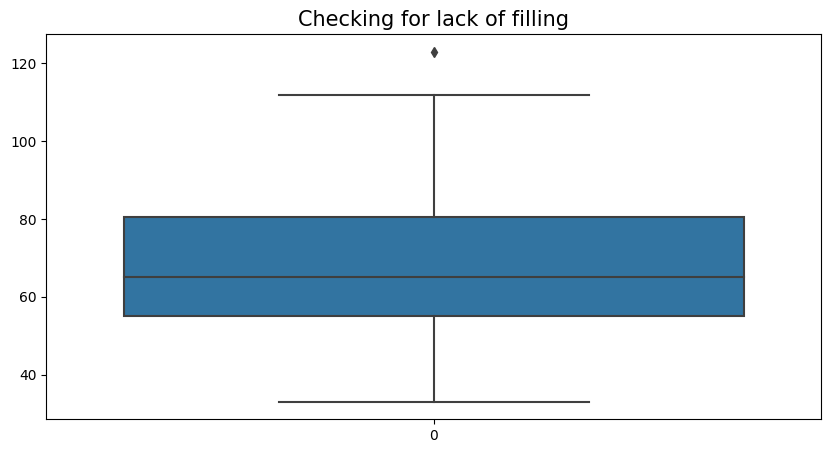

In [12]:
# Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(df['ROUBO EM VIA URBANA'])
plt.title('Checking for lack of filling', fontsize=15)
plt.show()

In [13]:
round(df['ROUBO EM VIA URBANA'].describe())

count     59.0
mean      68.0
std       20.0
min       33.0
25%       55.0
50%       65.0
75%       80.0
max      123.0
Name: ROUBO EM VIA URBANA, dtype: float64

In [14]:
import numpy as np

In [16]:
mean = np.mean(df['ROUBO EM VIA URBANA'], axis=0)
sd   = np.std(df['ROUBO EM VIA URBANA'], axis=0)

In [17]:
mean - 2 * sd

27.619126889412286

In [18]:
mean + 2 * sd

108.68595785635043

In [19]:
# Listing values ​​above the mean by twice the standard deviation
for x in df['ROUBO EM VIA URBANA']:
  if (x > mean + 2 * sd):
    print(x)

123
110
112


In [54]:
df.drop(df.loc[df['ROUBO EM VIA URBANA'] >= 110 ].index, inplace=True)

In [55]:
y = df['ROUBO EM VIA URBANA'].values

In [56]:
y

array([ 89, 108,  80,  94,  90,  64,  81,  68,  58,  98,  68,  62,  89,
        99,  87,  84,  79,  65,  89,  80,  68,  61,  59,  61,  56,  33,
        33,  39,  48,  56,  50,  70,  56,  65,  55,  60,  40,  46,  58,
        78,  63,  66,  72,  55,  42,  55,  40,  50,  72,  82,  57,  51,
        40,  76,  76,  55])

In [57]:
X = df.drop(['ROUBO EM VIA URBANA'], axis=1)

In [58]:
X

,OPERAÇÃO BLITZ,VEÍCULOS ABORDADOS - DUAS RODAS,VEÍCULOS DUAS RODAS RECUPERADOS,VEÍCULOS QUATRO RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito),MASCULINO - ADULTO - CONDUZIDO,FEMININO - ADOLESCENTE - CONDUZIDO,MASCULINO - ADULTO FORAGIDO (Nº de presos por mandado de prisão/evasão),MASCULINO - ADOLESCENTE FORAGIDO (Nº de apreendidos por mandado de apreensão/evasão),FEMININO - ADOLESCENTE FORAGIDO (Nº de apreendidos por mandado de apreensão/evasão),POLICIAMENTO EM EVENTO
1,0,1519,16,1,79,1,27,2,0,3
3,24,1849,11,1,92,1,29,0,0,5
5,0,1311,17,0,86,1,40,1,0,1
6,0,1452,15,0,89,0,44,3,0,0
7,3,2684,18,0,79,0,45,1,0,5
8,2,1407,10,0,82,3,46,4,0,0
9,0,1173,8,1,108,0,44,1,0,0
10,0,1364,11,0,79,0,38,1,0,1
11,0,1180,2,1,52,1,30,2,0,0
12,0,1455,8,1,76,0,52,0,0,5


In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler(feature_range= (0,1))
rescaledX = scaler.fit_transform(X)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [62]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.1, random_state=42)

In [63]:
lm = LinearRegression()

In [64]:
lm.fit(X_train, y_train)

LinearRegression()

In [65]:
result = lm.predict(X_test)

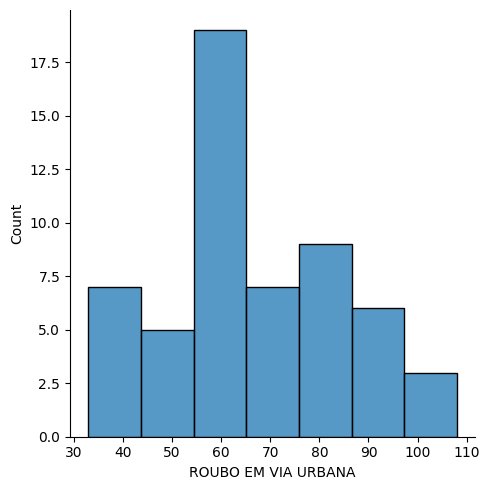

In [66]:
sns.displot(df, x='ROUBO EM VIA URBANA')
plt.tight_layout()

In [67]:
from sklearn import metrics

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, result))
print('MSE:', metrics.mean_squared_error(y_test, result))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, result)))
print('R:', metrics.r2_score(y_test, result))

MAE: 17.640289210062342
MSE: 384.2100967157894
RMSE: 19.601277935782385
R: -0.7212000350632675


In [69]:
def adjusted_R(y, result, N):
  adj_r = (1 - ((1 - metrics.r2_score(y, result)) * (len(y) - 1)) / (len(y) - N - 1))
  return adj_r

In [70]:
print('R-adjust:', adjusted_R(y_test, result, X_train.shape[1]))

R-adjust: 2.7212000350632675


In [71]:
# Qual variável é mais importante para o meu modelo?
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
OPERAÇÃO BLITZ,23.561135
VEÍCULOS ABORDADOS - DUAS RODAS,39.114930
VEÍCULOS DUAS RODAS RECUPERADOS,12.932919
VEÍCULOS QUATRO RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito),4.330450
MASCULINO - ADULTO - CONDUZIDO,10.667710
FEMININO - ADOLESCENTE - CONDUZIDO,-2.038280
MASCULINO - ADULTO FORAGIDO (Nº de presos por mandado de prisão/evasão),16.899468
MASCULINO - ADOLESCENTE FORAGIDO (Nº de apreendidos por mandado de apreensão/evasão),4.768136
FEMININO - ADOLESCENTE FORAGIDO (Nº de apreendidos por mandado de apreensão/evasão),2.258466
POLICIAMENTO EM EVENTO,-0.028347


In [72]:
coef.sort_values(by='Coefs', ascending=False).head(n=30)

,Coefs
VEÍCULOS ABORDADOS - DUAS RODAS,39.114930
OPERAÇÃO BLITZ,23.561135
MASCULINO - ADULTO FORAGIDO (Nº de presos por mandado de prisão/evasão),16.899468
VEÍCULOS DUAS RODAS RECUPERADOS,12.932919
MASCULINO - ADULTO - CONDUZIDO,10.667710
MASCULINO - ADOLESCENTE FORAGIDO (Nº de apreendidos por mandado de apreensão/evasão),4.768136
VEÍCULOS QUATRO RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito),4.330450
FEMININO - ADOLESCENTE FORAGIDO (Nº de apreendidos por mandado de apreensão/evasão),2.258466
POLICIAMENTO EM EVENTO,-0.028347
FEMININO - ADOLESCENTE - CONDUZIDO,-2.038280


In [73]:
coef[coef['Coefs'] > 0.0]

,Coefs
OPERAÇÃO BLITZ,23.561135
VEÍCULOS ABORDADOS - DUAS RODAS,39.114930
VEÍCULOS DUAS RODAS RECUPERADOS,12.932919
VEÍCULOS QUATRO RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito),4.330450
MASCULINO - ADULTO - CONDUZIDO,10.667710
MASCULINO - ADULTO FORAGIDO (Nº de presos por mandado de prisão/evasão),16.899468
MASCULINO - ADOLESCENTE FORAGIDO (Nº de apreendidos por mandado de apreensão/evasão),4.768136
FEMININO - ADOLESCENTE FORAGIDO (Nº de apreendidos por mandado de apreensão/evasão),2.258466


In [40]:
# Deleting columns that don't contribute to the forecast
df = df.drop(columns=['RONDAS PREVENTIVAS EM ÁREA URBANA',
                      'ARMAS DE FOGO',
                      'NOTIFICAÇÕES DE TRÂNSITO - (Nº de Infrações diversas - AIPs)',
                      'FEMININO - ADULTO - CONDUZIDO',
                      'POSTOS FIXOS (PB)',
                      'POLICIAMENTO ESCOLAR - RONDAS PREVENTIVAS',
                      'ARMA BRANCA',
                      'OPERAÇÃO POLICIAL',
                      'OPERAÇÃO EM APOIO A OUTRO ÓRGÃO',
                      'VEÍCULOS QUATRO RODAS RECUPERADOS',
                      'MASCULINO - ADOLESCENTE - CONDUZIDO',
                      'Nº DE OCORRÊNCIAS QUE RESULTARAM EM AUTO DE PRISÃO FLAGRANTE DELITO',
                      'FEMININO - ADULTO FORAGIDO (Nº de presos por mandado de prisão/evasão)',
                      'Nº DE OCORRÊNCIAS QUE RESULTARAM EM T.C.O',
                      'PESSOAS ABORDADAS'
                      ])

In [41]:
df = df.drop(columns=['VEÍCULOS ABORDADOS - QUATRO RODAS'])
df = df.drop(columns=['RONDAS PREVENTIVAS EM ÁREA RURAL'])
df = df.drop(columns=['VEÍCULOS DUAS RODAS REMOVIDOS AO DETRAN/CIRETRAN (Por conta de fiscalização de trânsito)'])

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rf = RandomForestRegressor()

In [76]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [77]:
result2 = rf.predict(X_test)

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, result2))
print('MSE:', metrics.mean_squared_error(y_test, result2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, result2)))
print('R:', metrics.r2_score(y_test, result2))

MAE: 13.36
MSE: 254.40283333333335
RMSE: 15.950010449317372
R: -0.1396841712294674
